In [1]:
import numpy as np
import pandas as pd

C:\Users\saura\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\saura\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\saura\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('car data.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

In [3]:
del df['Car_Name']

In [4]:
df['Current_year']=2020

In [5]:
df['no_years'] = df['Current_year']-df['Year']

In [ ]:
df.head()

In [6]:
df.drop(['Year','Current_year'],axis=1,inplace =True)

In [ ]:
df.head()

In [7]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

In [ ]:
df.corr()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [9]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
X.head()

In [ ]:
y.head()

In [10]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesRegressor 
model=ExtraTreesRegressor() 
model.fit(X,y)

C:\Users\saura\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
print(model.feature_importances_)

[0.41486266 0.03806711 0.00074438 0.08534511 0.1898209  0.01059171
 0.13648851 0.12407963]


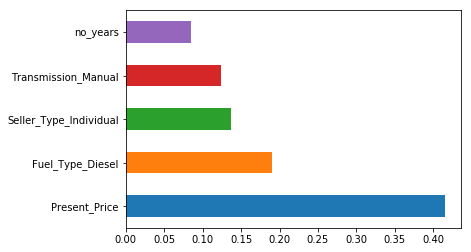

In [12]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
X_train.shape

(240, 8)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [16]:
clf = RandomForestRegressor()

In [17]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [2,4,6,7],
              "bootstrap": [True, False],
              'max_depth':[None,5,10,15,20,30],
                'min_samples_leaf':[1,2,5,10], 
                'min_samples_split':[2,5,10,15,100]
                  }

In [18]:
n_iter_search = 10
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='neg_mean_absolute_error',cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [2, 4, 6, 7], 'bootstrap': [True, False], 'max_depth': [None, 5, 10, 15, 20, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10, 15, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [19]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [20]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [21]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -0.736 (std: 0.354)
Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': None, 'bootstrap': True}

Model with rank: 2
Mean validation score: -0.827 (std: 0.390)
Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 10, 'bootstrap': True}

Model with rank: 3
Mean validation score: -0.832 (std: 0.419)
Parameters: {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 15, 'bootstrap': False}

Model with rank: 4
Mean validation score: -0.870 (std: 0.515)
Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 6, 'max_depth': None, 'bootstrap': False}

Model with rank: 5
Mean validation score: -0.910 (std: 0.425)
Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': 15, 'bootstrap': True

In [22]:
rf=random_search.best_estimator_

In [23]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
test_pred=rf.predict(X_test)

In [25]:
test_pred

array([ 0.70171,  5.10975,  0.73826,  4.5144 ,  4.5963 ,  4.50175,
        0.48638,  8.68167,  5.0312 ,  7.05134,  0.54954,  6.54095,
       17.59631,  7.14466,  0.31219,  5.1386 ,  4.35335,  2.88735,
        2.54357,  2.50033,  3.47445,  3.3493 ,  0.59008, 15.94973,
        0.26736,  4.71045,  3.26695,  5.725  ,  8.25741,  4.421  ,
        3.5201 ,  6.59355,  0.34541,  4.35695,  0.60792,  4.92479,
        5.1727 ,  0.59842,  0.49358,  4.98573,  0.39204,  5.41525,
        0.48417,  1.03129,  5.23569,  7.14651,  2.75485, 20.10578,
        0.42494,  0.36581, 22.22105,  3.923  ,  6.48265,  6.0616 ,
       20.36728,  1.17429,  0.75718, 15.64327,  0.29384,  8.74735,
       10.36902])

C:\Users\saura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


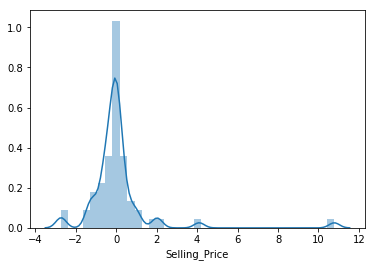

In [26]:
sns.distplot(y_test-test_pred)

In [27]:
import pickle
file= open('random_forest_regression_model.pkl','wb')

pickle.dump(random_search,file)